In [1]:
import numpy as np 
import pandas as pd

%matplotlib inline
from matplotlib import style
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
training_set = pd.read_csv("train.csv")
test_set = pd.read_csv("test.csv")

In [3]:
training_set.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
test_set.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
training_set.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [7]:
genre = {"male": 0, "female": 1}
data = [training_set, test_set]
for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genre)

In [8]:
data = [training_set, test_set]
for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

In [9]:
emb = {"S": 0, "C": 1, "Q": 2}
data = [training_set, test_set]
for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(emb)

In [10]:
pourcentage1 = training_set.isnull().sum() / training_set.isnull().count()*100
pourcentage2 = (round(pourcentage1, 1)).sort_values(ascending=False)
total = training_set.isnull().sum().sort_values(ascending=False)

In [11]:
données_manquantes = pd.concat([total, pourcentage2], axis = 1, keys=['total', '%'])
données_manquantes.head(5)

,total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
Fare,0,0.0
Ticket,0,0.0


In [12]:
training_set['Embarked'].describe()

count    889.000000
mean       0.362205
std        0.636157
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        2.000000
Name: Embarked, dtype: float64

In [13]:
test_set['Embarked'].describe()

count    418.000000
mean       0.464115
std        0.685516
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        2.000000
Name: Embarked, dtype: float64

In [14]:
valeur_top = '0'
data = [training_set, test_set]
for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(valeur_top)

In [15]:
data = [training_set, test_set]
for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].astype(int)

In [16]:
training_set = training_set.drop(['PassengerId'], axis=1)
training_set = training_set.drop(['Ticket'], axis=1)
test_set = test_set.drop(['Ticket'], axis=1)

In [17]:
training_set = training_set.drop(['Cabin'], axis=1)
test_set = test_set.drop(['Cabin'], axis=1)

In [18]:
data = [training_set, test_set]

for dataset in data :
    mean = training_set['Age'].mean()
    std = test_set['Age'].std()
    null = dataset["Age"].isnull().sum()
    
    valeur_ajoutée = np.random.randint(mean - std, mean + std, size = null)
    
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = valeur_ajoutée
    dataset["Age"] = age_slice
    dataset["Age"] = training_set["Age"].astype(int)

In [19]:
training_set["Age"].isnull().sum()

0

/Users/fall/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


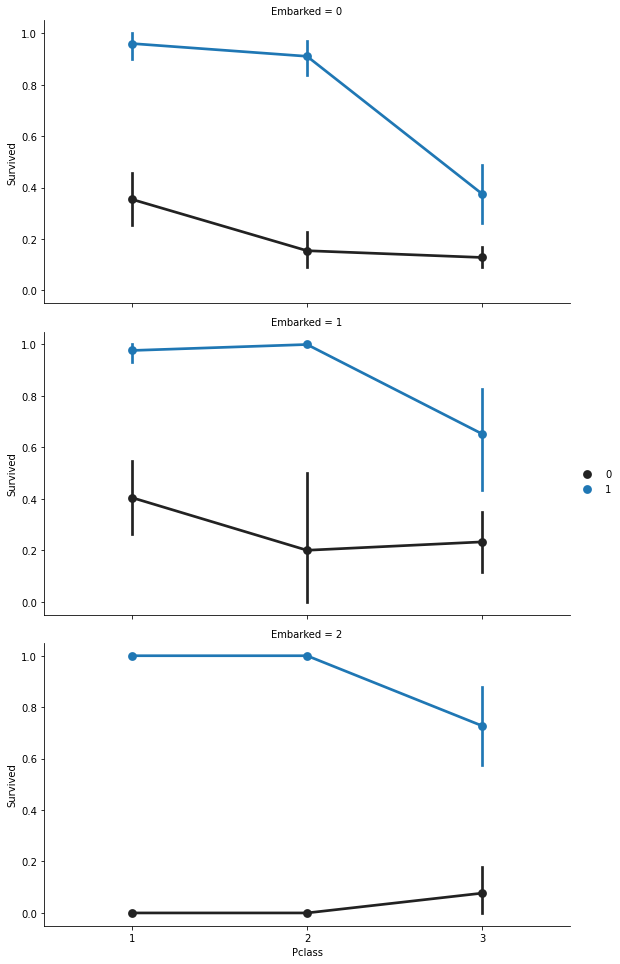

In [20]:
graphique1 = sns.FacetGrid(training_set, row='Embarked', size=4.5, aspect=1.8)
graphique1.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette=None,  order=None, hue_order=None )
graphique1.add_legend()

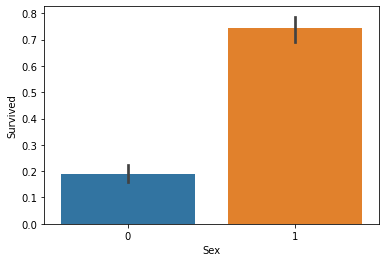

In [22]:
sns.barplot(x='Sex', y='Survived', data=training_set)

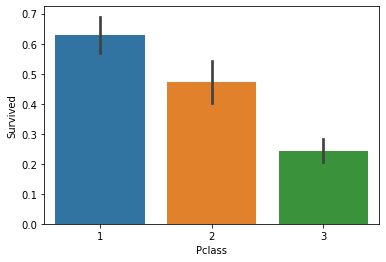

In [23]:
sns.barplot(x='Pclass', y='Survived', data=training_set)

/Users/fall/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


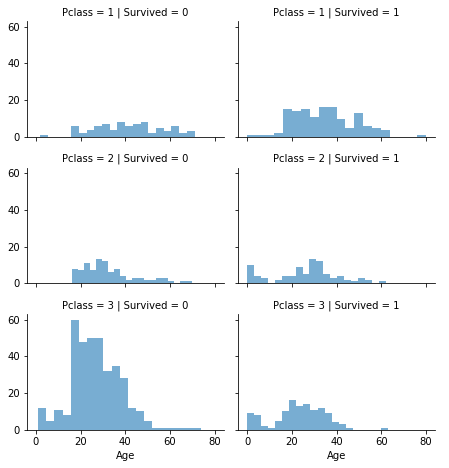

In [24]:
graphique2 = sns.FacetGrid(training_set, col='Survived', row='Pclass', size=2.2, aspect=1.4)
graphique2.map(plt.hist, 'Age', alpha=.6, bins=20)
graphique2.add_legend()

In [25]:
data = [training_set, test_set]
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
    dataset['not_alone'] = dataset['not_alone'].astype(int)

In [26]:
training_set['not_alone'].value_counts()

1    537
0    354
Name: not_alone, dtype: int64

/Users/fall/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


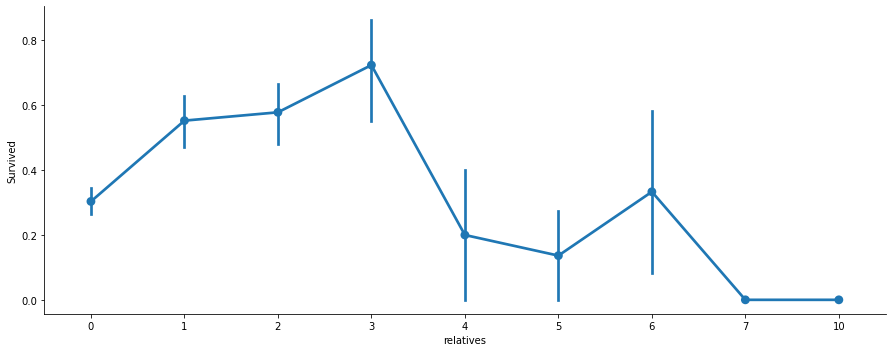

In [29]:
groupe = sns.factorplot('relatives','Survived', data=training_set, aspect = 2.5)

In [30]:
data = [training_set, test_set]
titles = {"Hero": 1, "Senior": 2, "Master": 3, "President": 4, "Rare": 5}

In [31]:
for dataset in data:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Hero', 'Senior')
    dataset['Title'] = dataset['Title'].replace('Master', 'President')
    dataset['Title'] = dataset['Title'].replace('Master', 'Rare')
    dataset['Title'] = dataset['Title'].map(titles)
    dataset['Title'] = dataset['Title'].fillna(0)

In [32]:
training_set = training_set.drop(['Name'], axis=1)
test_set = test_set.drop(['Name'], axis=1)

In [33]:
data = [training_set, test_set]
for dataset in data:
    dataset.loc[ dataset['Fare'] <= 7, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7) & (dataset['Fare'] <= 55), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 55) & (dataset['Fare'] <= 135), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 135) & (dataset['Fare'] <= 215), 'Fare']   = 3
    dataset.loc[(dataset['Fare'] > 215) & (dataset['Fare'] <= 250), 'Fare']   = 4
    dataset.loc[ dataset['Fare'] > 250, 'Fare'] = 5
    dataset['Fare'] = dataset['Fare'].astype(int)

In [34]:
training_set['Fare'].value_counts()

1    514
0    241
2    105
3     15
5      9
4      7
Name: Fare, dtype: int64

In [35]:
data = [training_set, test_set]
for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 10, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 10) & (dataset['Age'] <= 20), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 20) & (dataset['Age'] <= 30), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 30) & (dataset['Age'] <= 40), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 50), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 50) & (dataset['Age'] <= 60), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 60) & (dataset['Age'] <= 70), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 70, 'Age'] = 6

In [36]:
training_set['Age'].value_counts()

2    289
3    222
1    160
4     92
0     64
5     42
6     22
Name: Age, dtype: int64

In [37]:
data = [training_set, test_set]
for dataset in data:
    dataset['ageClass']= dataset['Age']* dataset['Pclass']
  
data = [training_set, test_set]
for dataset in data:
    dataset['farePerson'] = dataset['Fare']/(dataset['relatives']+1)
    dataset['farePerson'] = dataset['farePerson'].astype(int)

In [42]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [43]:
X_train = training_set.drop("Survived", axis=1)
Y_train = training_set["Survived"]
X_test  = test_set.drop("PassengerId", axis=1).copy()

In [46]:
training_set.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,alone,Title,ageClass,farePerson
0,0,3,0,2,1,0,0,0,1,0,0,0.0,6,0
1,1,1,1,3,1,0,2,1,1,0,0,0.0,3,1
2,1,3,1,2,0,0,0,0,0,1,1,0.0,6,0
3,1,1,1,3,1,0,1,0,1,0,0,0.0,3,0
4,0,3,0,3,0,0,1,0,0,1,1,0.0,9,1


In [47]:
print(X_train)

     Pclass  Sex  Age  SibSp  Parch  Fare  Embarked  relatives  not_alone  \
0         3    0    2      1      0     0         0          1          0   
1         1    1    3      1      0     2         1          1          0   
2         3    1    2      0      0     0         0          0          1   
3         1    1    3      1      0     1         0          1          0   
4         3    0    3      0      0     1         0          0          1   
..      ...  ...  ...    ...    ...   ...       ...        ...        ...   
886       2    0    2      0      0     1         0          0          1   
887       1    1    1      0      0     1         0          0          1   
888       3    1    4      1      2     1         0          3          0   
889       1    0    2      0      0     1         1          0          1   
890       3    0    3      0      0     0         2          0          1   

     alone  Title  ageClass  farePerson  
0        0    0.0         6      

In [49]:
print(Y_train)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [50]:
print(X_test)

     Pclass  Sex  Age  SibSp  Parch  Fare  Embarked  relatives  not_alone  \
0         3    0    2      0      0     0         2          0          1   
1         3    1    3      1      0     0         0          1          0   
2         2    0    2      0      0     1         2          0          1   
3         3    0    3      0      0     1         0          0          1   
4         3    1    3      1      1     1         0          2          0   
..      ...  ...  ...    ...    ...   ...       ...        ...        ...   
413       3    0    1      0      0     1         0          0          1   
414       1    1    4      0      0     2         1          0          1   
415       3    0    3      0      0     0         0          0          1   
416       3    0    3      0      0     1         0          0          1   
417       3    0    1      1      1     1         1          2          0   

     alone  Title  ageClass  farePerson  
0        1    0.0         6      

In [53]:
from sklearn.linear_model import LogisticRegression
reglog = LogisticRegression()

In [54]:
reglog.fit(X_train, Y_train)

LogisticRegression()

In [55]:
Y_pred = reglog.predict(X_test)

In [56]:
reglog_acc = round(reglog.score(X_train, Y_train) * 100, 2)
print(round(reglog_acc,2,), "%")

80.92 %


In [57]:
from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier()
dec_tree.fit(X_train, Y_train)

Y_pred = dec_tree.predict(X_test)

dec_tree_accuracy = round(dec_tree.score(X_train, Y_train) * 100, 2)
print(round(dec_tree_accuracy,2,), "%")

89.34 %


In [61]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(criterion = 'gini',
                                       min_samples_leaf = 1, 
                                       min_samples_split = 8,
                                       n_estimators=100,
                                       oob_score=True)
random_forest.fit(X_train, Y_train)

Y_pred = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)
random_forest_accuracy = round(random_forest.score(X_train, Y_train) * 100, 2)
print(round(random_forest_accuracy,2,), "%")

87.88 %


In [62]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 4)
knn.fit(X_train, Y_train)

Y_pred = knn.predict(X_test)

knn_accuracy = round(knn.score(X_train, Y_train) * 100, 2)
print(round(knn_accuracy,2,), "%")

83.5 %


In [64]:
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, Y_train)

Y_pred = naive_bayes.predict(X_test)

naive_bayes_accuracy = round(naive_bayes.score(X_train, Y_train) * 100, 2)
print(round(naive_bayes_accuracy,2,), "%")

79.46 %


In [65]:
from sklearn.svm import SVC, LinearSVC
svc = LinearSVC()
svc.fit(X_train, Y_train)

Y_pred = svc.predict(X_test)

svc_accuracy = round(svc.score(X_train, Y_train) * 100, 2)
print(round(svc_accuracy,2,), "%")

81.14 %


/Users/fall/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [66]:
from sklearn.linear_model import Perceptron
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)

Y_pred = perceptron.predict(X_test)

percept_accuracy = round(perceptron.score(X_train, Y_train) * 100, 2)
print(round(percept_accuracy,2,), "%")

74.41 %


In [67]:
model_comparison_table = pd.DataFrame({
    'Modeles': ['Regression Logistique',
                'Arbre Décisionnelle',
                'Foret Aleatoire',
                'K plus proche voisin',
                'Naive Bayes',
                'machine a vecteurs de support',
                'Perceptron'],
    'Score': [reglog_acc,
              dec_tree_accuracy,
              random_forest_accuracy,
              knn_accuracy,
              naive_bayes_accuracy,
              svc_accuracy,
              percept_accuracy]})

In [68]:
resultats = model_comparison_table.sort_values(by='Score', ascending=False)
print(resultats)

                         Modeles  Score
1            Arbre Décisionnelle  89.34
2                Foret Aleatoire  87.88
3           K plus proche voisin  83.50
5  machine a vecteurs de support  81.14
0          Regression Logistique  80.92
4                    Naive Bayes  79.46
6                     Perceptron  74.41


In [71]:
var_importance = pd.DataFrame({'Variables':X_train.columns,'Importance':np.round(random_forest.feature_importances_,2)})
importance_order = var_importance.sort_values('Importance', ascending=False).set_index('Variables')
print(importance)

            Importance
Variables             
Sex               0.40
Pclass            0.12
ageClass          0.10
Age               0.07
Fare              0.06
relatives         0.06
Embarked          0.05
SibSp             0.04
farePerson        0.04
Parch             0.02
alone             0.02
Title             0.02
not_alone         0.01


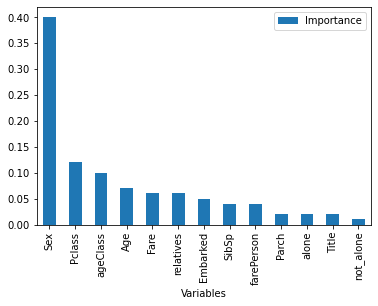

In [72]:
importance_order.plot.bar()

In [73]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

In [74]:
predictions = cross_val_predict(random_forest, X_train, Y_train, cv=3)
print(predictions)

[0 1 1 1 0 0 0 0 1 1 1 1 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 1 0
 0 1 1 1 1 0 1 0 0 0 1 0 1 0 0 1 1 0 1 1 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0
 1 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 1 0
 1 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1
 0 1 0 0 0 1 0 0 1 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0
 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 1 1 1
 1 0 0 0 0 1 0 0 0 1 1 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 1
 0 1 0 1 1 0 0 1 0 1 1 1 0 1 1 1 1 0 0 1 1 0 1 1 0 0 1 1 0 1 0 1 0 1 1 0 0
 0 1 0 0 1 0 0 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 1
 0 0 0 1 0 1 1 1 0 0 1 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0
 1 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 1 0 0 1
 0 1 1 0 1 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 0 0 0 1 0
 0 0 0 1 0 1 0 0 1 0 0 0 

In [75]:
confusion_matrix(Y_train, predictions)

array([[483,  66],
       [103, 239]])

In [79]:
from sklearn.metrics import classification_report
print(classification_report(Y_train, predictions))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       549
           1       0.78      0.70      0.74       342

    accuracy                           0.81       891
   macro avg       0.80      0.79      0.79       891
weighted avg       0.81      0.81      0.81       891



In [80]:
prob_pred = random_forest.predict_proba(X_train)
y_score = prob_pred[:,1]

In [81]:
precision, recall, seuil = precision_recall_curve(Y_train, y_score)

<ipython-input-82-b41987752904>:5: MatplotlibDeprecationWarning: Unrecognized location 'haut à droite'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  plt.legend(loc="haut à droite", fontsize=20)


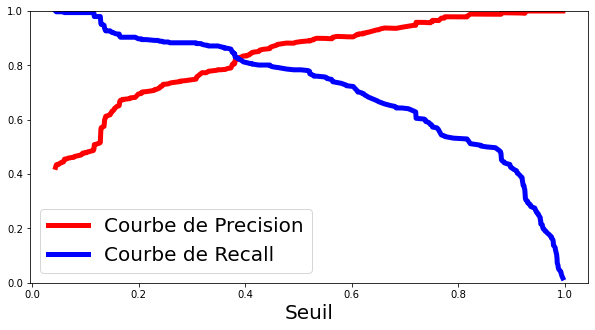

In [82]:
def plot(precision, recall, seuil):
    plt.plot(seuil, precision[:-1], "r-", label="Courbe de Precision", linewidth=5)
    plt.plot(seuil, recall[:-1], "b", label="Courbe de Recall", linewidth=5)
    plt.xlabel("Seuil", fontsize=20)
    plt.legend(loc="haut à droite", fontsize=20)
    plt.ylim([0, 1])

plt.figure(figsize=(10, 5))
plot(precision, recall, seuil)
plt.show()

In [83]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [84]:
faux_positive, vrai_positive, seuils = roc_curve(Y_train, y_score)

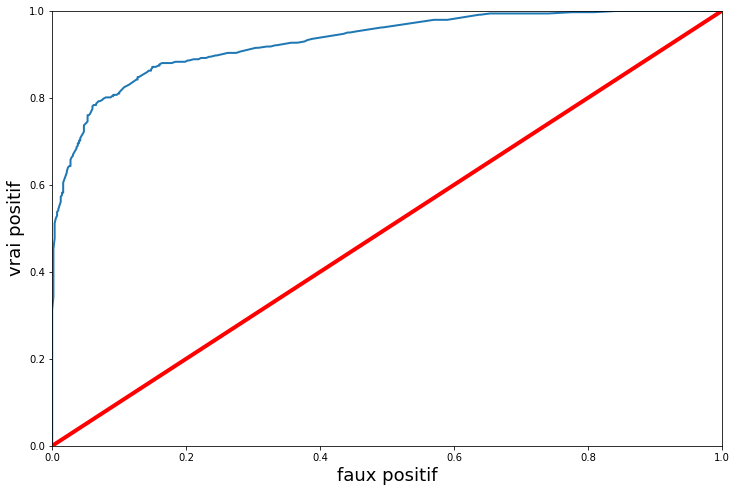

In [85]:
def Courbe_ROC(faux_positive, vrai_positive, label=None):
    plt.plot(faux_positive, vrai_positive, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('faux positif', fontsize=18)
    plt.ylabel('vrai positif', fontsize=18)

plt.figure(figsize=(12, 8))
Courbe_ROC(faux_positive, vrai_positive)
plt.show()

In [86]:
Score_ROC = roc_auc_score(Y_train, y_score)
print("Score ROC", Score_ROC*100)

Score ROC 93.01441216885564
